**Importing all the libraries**

In [39]:
!pip install lightgbm

In [40]:
import pandas as pd
from datetime import datetime 
import pickle
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression



**Importing the dataset**

In [41]:
df = pd.read_csv("finaldataset.csv")

In [42]:
df.head()

,session_position,session_length,skip_2,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.695652,1.0,0.085263,1.0,0.996808,0.015914,0.442794,0.486798,0.663098,0.171768,0.553524,0.922667,0.003487,0.090909,0.677358,0.789668,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.315789,0.2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.739130,1.0,0.085263,1.0,0.996808,0.015914,0.442794,0.486798,0.663098,0.171768,0.553524,0.922667,0.003487,0.090909,0.677358,0.789668,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.263158,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.913043,1.0,0.085263,1.0,0.996808,0.015914,0.442794,0.486798,0.663098,0.171768,0.553524,0.922667,0.003487,0.090909,0.677358,0.789668,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.421053,0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.782609,1.0,0.085263,1.0,0.996808,0.015914,0.442794,0.486798,0.663098,0.171768,0.553524,0.922667,0.003487,0.090909,0.677358,0.789668,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.315789,0.2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.826087,0.0,0.085263,1.0,0.996808,0.015914,0.442794,0.486798,0.663098,0.171768,0.553524,0.922667,0.003487,0.090909,0.677358,0.789668,0.546784,1.0,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [43]:
df.dropna(axis = 0, inplace = True)

In [44]:
x = df.drop(['skip_2'],axis = "columns")
y = df.skip_2

**Splitting the Dataset**

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20 , random_state = 4)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((8566, 62), (8566,), (2142, 62), (2142,))

**Selecting a suitable Model**

**1. Light GBT**

In [46]:
d_train = lgb.Dataset(x_train, label=y_train)

In [47]:
lgbm_params = {'learning_rate':0.23, 'boosting_type':'dart',
              'objective':'binary',
              'metric':['auc', 'binary_logloss'],
              'num_leaves':2500,
              'max_depth':5,
              "min_data_in_leaf": 200,
              "lambda_l1": 15,
              "lambda_l2": 70,
              "min_gain_to_split": 2,
              "bagging_fraction": 0.7,
              "bagging_freq": 1,
              "feature_fraction": 0.9}

In [48]:
from datetime import datetime
start=datetime.now()
clf = lgb.train(lgbm_params, d_train, 200) #50 iterations. Increase iterations for small learning rates
stop=datetime.now()
execution_time_lgbm = stop-start
print("LGBM execution time is: ", execution_time_lgbm)

LGBM execution time is:  0:00:00.878941


In [49]:
from sklearn import metrics

# Prediction on Test data
y_pred_lgbm=clf.predict(x_test)


#convert into binary values 0/1 for classification
for i in range(0, x_test.shape[0]):
    if y_pred_lgbm[i]>=0.5:       # setting threshold to 0.5
       y_pred_lgbm[i]=1
    else:  
       y_pred_lgbm[i]=0
       
#Print accuracy
print ("Accuracy with LGBM = ", metrics.accuracy_score(y_pred_lgbm,y_test))

Accuracy with LGBM =  0.853874883286648


In [50]:
# Prediction on train data
yt_pred = clf.predict(x_train)

#convert into binary values 0/1 for classification
for i in range(0, x_train.shape[0]):
    if yt_pred[i] >= 0.5:    # setting threshold to 0.5   
        yt_pred[i] = 1
    else:  
        yt_pred[i] = 0

#Print accuracy
print ("Accuracy with LGBM = ", metrics.accuracy_score(yt_pred,y_train))

Accuracy with LGBM =  0.8646976418398319


In [51]:
 import pickle

filename = 'gbt3.pkl'
pickle.dump(clf, open('gbt3.pkl', 'wb'))

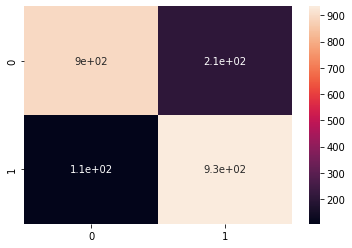

In [52]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting confusion matrix using heatmap
plt.figure()
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm_lgbm, annot = True)
plt.show()

**2. Logistic Regression**

In [53]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score

score_model = round(accuracy_score(y_pred,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_model)+" %")

The accuracy score achieved using Logistic Regression is: 85.53 %


In [55]:
import pickle

filename = 'logistic_regression.pkl'
pickle.dump(model, open('logistic_regression.pkl', 'wb'))